(content:chapter:differentialequations)=

# Alternating Current: Differential Equation Approach

In [1]:
import schemdraw.elements as elm
import schemdraw
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'


Before moving to phasor analysis of resistive, capacitive, and inductive circuits, this chapter looks at analysis of such circuits using differential equations directly. The aim is to show that phasor analysis makes our lives _much_ easier.

For an excellent review of the mathematics of solving linear, first order, constant coefficient differential equations, see {cite:ts}`paul_dawkins_math_notes`.

## Voltage Divider

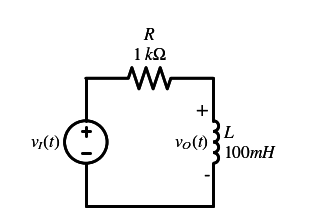

In [2]:
with schemdraw.Drawing(file='voltage-divider-resistor-inductor.svg') as d:
    d += elm.SourceV().label('$v_I(t)$').up()
    d += elm.Resistor().label('$R$\n$1~k\Omega$').right()
    d += elm.Inductor().label('$L$\n$100 mH$',loc='bot').down().label(['+', '$v_O(t)$','-'])
    d += elm.Line().left()

```{index} Voltage Divider

```

`````{admonition} Example


```{figure} voltage-divider-resistor-inductor.svg
---
height: 300px
name: voltage-divider-resistor-inductor
---
```

Find v$_O$(t) given that $v_I(t)=4 \cos(10000t+45^\circ)$ V

````{admonition} Solution using differential equations
:class: tip, dropdown
First remember that

$$v_O(t) = L \frac{d~i(t)}{dt}$$

and that

$$ v_R(t) = R i(t).$$

Then, from Kirchhoff's Voltage Law:

$$ v_I(t) = v_R(t) + v_O(t)$$

or

$$ 4 \cos(10000t+45^\circ) = R i(t) + L \frac{d~i(t)}{dt}$$

Now, we need to solve this linear, first order differential equation ({cite:ts}`paul_dawkins_math_notes`).

```{note} Dawkins' approach
:class: dropdown

{cite:ts}`paul_dawkins_math_notes` says to:

- Put the differential equation in the correct initial form.

$$ \frac{d~i(t)}{dt} + p(t) i(t) = g(t) $$

- Find the integrating factor $\mu(t)$ using

$$ \mu(t) = e^{\int p(t) dt} $$

- Multiply everything in the differential equation by $\mu(t)$ and verify that the left side becomes the product rule $(\mu(t)y(t))^′$ and write it as such.

- Integrate both sides, make sure you properly deal with the constant of integration.

- Solve for the solution $i(t)$.

```

To get the equation into the correct form, just swap sides and divide both sides by $L$:

$$  \frac{R}{L} i(t) +  \frac{d~i(t)}{dt} = \frac{4}{L} \cos(10000t+45^\circ)$$

Then we can see that $p(t) = \frac{R}{L}$ so that

$$ \mu(t) = e^{\frac{R}{L} t} $$

Then

\begin{align*}
\mu(t)\frac{R}{L} i(t) +  \mu(t)\frac{d~i(t)}{dt} &= \mu(t)\frac{4}{L} \cos(10000t+45^\circ)\\
(\mu(t) i(t))' &= \mu(t)\frac{4}{L} \cos(10000t+45^\circ)
\end{align*}

and integrating both sides we get

\begin{align*}
\int (e^{\frac{R}{L} t} i(t))' dt &= \int e^{\frac{R}{L} t}\frac{4}{L} \cos(10000t+45^\circ) dt\\
e^{\frac{R}{L} t} i(t) + k &= \frac{4 e^{\frac{R}{L} t}}{10^8 L^2 + R^2}  \big [  10000 L \sin(10000t+45^\circ)   \\
&+ R \cos(10000t+45^\circ)  \big ] + c
\end{align*}

so that

\begin{align*}
i(t) &= \frac{4}{10^8 L^2 + R^2}  \big [ 10000 L \sin(10000t+45^\circ) \\
&+ R  \cos(10000t+45^\circ)  \big ] \\
& + \kappa e^{-\frac{R}{L} t}
\end{align*}

Substituting $L= 0.1$ and $R = 1000$ we get

\begin{align*}
i(t) &= \frac{4}{10^6 + 10^6} \big [ 1000 \sin(10000t+45^\circ)\\
&+ 1000 \cos(10000t+45^\circ) \big ] \\
&+ \kappa e^{-\frac{R}{L} t} \\
&= \frac{4}{10^6 + 10^6} 1000 \sqrt{2} \cos(10000 t) + \kappa e^{-\frac{R}{L} t}
\end{align*}

And after a long time ($t > 5 \frac{L}{R} = 500 \mu s$)

$$ i(t) = \frac{2 \sqrt{2}}{1000} \cos(10000 t)  $$

So

\begin{align*}
v_O(t) &= L \frac{d~i(t)}{dt} \\
&=  0.1 \times ( - 10000 \times \frac{2 \sqrt{2}}{1000}  \sin(10000t)  )\\
&= -  2 \sqrt{2} \sin(10000t) \\
&= 2 \sqrt{2} \cos(10000 t + 90^\circ)
\end{align*}

````
`````

## Current Divider

```{index} Current Divider

```

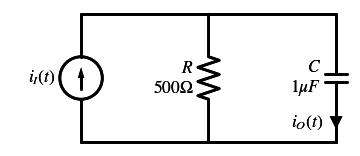

In [3]:
with schemdraw.Drawing(file='current-divider-resistor-capacitor.svg') as d:
    d += elm.SourceI().label('$i_I(t)$').up()
    d += elm.Line().right()
    d.push()
    d += elm.Line().right()
    d += (C:= elm.Capacitor().down().label('$C$\n$1 \mu F$'))
    d += elm.Line().left().length(6)
    d.pop()
    d += elm.Resistor().down().label('$R$\n$500 \Omega$')
    d += elm.CurrentLabelInline(direction='in', ofst=0.3).at(C.end).label('$i_O(t)$')

`````{admonition} Example


```{figure} current-divider-resistor-capacitor.svg
---
height: 300px
name: current-divider-resistor-capacitor
---
```

Find $i_O(t)$ given that $i_I(t)=400 \cos(1000t-30^\circ)$ mA.

````{admonition} Solution using differential equations
:class: tip, dropdown

Here

$$ i_O(t) = C \frac{d~v_C(t)}{dt} $$

and applying Kirchhoff's Current Law (KCL) to the top node we get

$$ i_I(t) = v_R(t) / R  + C \frac{d~v_C(t)}{dt} $$

Rearranging this into Dawkins' preferred format, we get

$$ \frac{1}{RC} v_R(t) + \frac{d~v_C(t)}{dt} = 400 \cos(1000t-30^\circ) $$

and noting that $v_R(t) = v_C(t)$

$$ \frac{1}{RC} v(t) + \frac{d~v(t)}{dt} = 400 \cos(1000t-30^\circ) $$

For this example, our integrating factor $\mu(t)$ is now

$$ \mu(t) = e^{\frac{t}{RC}} $$

and multiplying both sides of our differential equation by this factor yields

$$ \frac{d}{dt} (\mu(t) v(t)) = \mu(t) 400 \cos(1000t-30^\circ ).$$

We can now integrate this as we did in the voltage divider example to give

\begin{align*}
\int \frac{d}{dt}  (e^{\frac{t}{RC}} v(t)) dt &=  \int e^{\frac{t}{RC}} 400 \cos(1000t-30^\circ) dt \\
\int \frac{d}{dt} (e^{\frac{t}{5 \times 10^{-4}}} v(t)) dt &=  \int e^{\frac{t}{5 \times 10^{-4}}} 400 \cos(1000t-30^\circ) dt \\
e^{2000 t} v(t) + c &= 0.178885 e^{2000 t} \sin(1000 t + 33.4^\circ ) + k\\
v(t) &= 0.178885 \sin(1000 t + 33.4^\circ ) + \kappa e^{-2000 t}
\end{align*}

And after a long time ($t > 5 RC = 2.5 ms$):

$$
v(t) = 0.178885 \sin(1000 t + 33.4^\circ )
$$

Then

\begin{align*}
i_O(t) &= C \frac{d~v(t)}{dt} \\
&=  1 \times 10^{-6} \times (  178.885 \cos(1000 t + 33.4^\circ) )\\
&= 178.885  \cos(1000 t + 33.4^\circ) \mu A
\end{align*}

````


`````

## Mesh Analysis

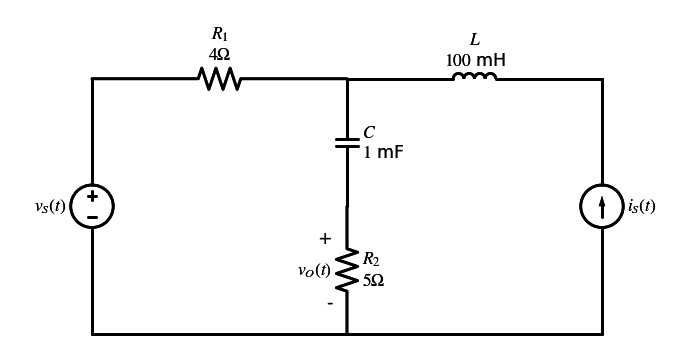

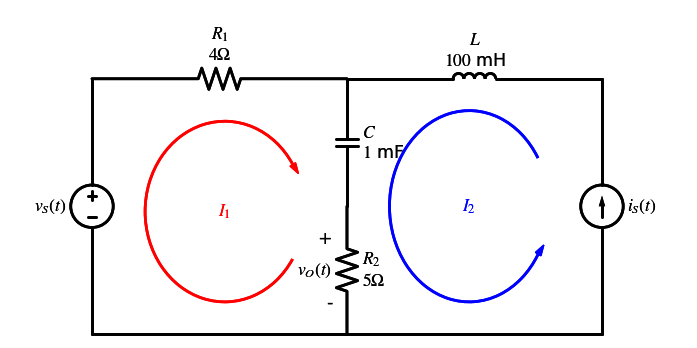

In [4]:
with schemdraw.Drawing(file='mesh-analysis-differential-equations.svg') as d:
    d += (VS := elm.SourceV().up().label('$v_S(t)$').length(6))
    d += (R1 := elm.Resistor().right().label('$R_1$\n$4 \Omega$').length(6))
    d.push()
    d += (L := elm.Inductor().right().label('$L$\n$100$ mH').length(6))
    d += (IS := elm.SourceI().down().label('$i_S(t)$', loc='bot').length(6).reverse())
    d += (LN := elm.Line().length(12).left())
    d.pop()
    d += (C := elm.Capacitor().down().label('$C$\n$1$ mF', loc='bot'))
    d += (R2 := elm.Resistor().down().label(['+', '$v_O(t)$', '-']).label('$R_2$\n$5 \Omega$', loc='bot'))

with schemdraw.Drawing(file='mesh-analysis-differential-equations-meshes.svg') as d:
    d += (VS := elm.SourceV().up().label('$v_S(t)$').length(6))
    d += (R1 := elm.Resistor().right().label('$R_1$\n$4 \Omega$').length(6))
    d.push()
    d += (L := elm.Inductor().right().label('$L$\n$100$ mH').length(6))
    d += (IS := elm.SourceI().down().label('$i_S(t)$', loc='bot').length(6).reverse())
    d += (LN := elm.Line().length(12).left())
    d.pop()
    d += (C := elm.Capacitor().down().label('$C$\n$1$ mF', loc='bot'))
    d += (R2 := elm.Resistor().down().label(['+', '$v_O(t)$', '-']).label('$R_2$\n$5 \Omega$', loc='bot'))
    d += elm.LoopCurrent([R1,C,LN,VS], pad = 0.75).label('$I_1$').color('red')
    d += elm.LoopCurrent([L,IS,LN,C], pad = 0.75, direction = 'ccw').label('$I_2$').color('blue')

```{index} Mesh Analysis

```

`````{admonition} Example

Solve for $v_O(t)$ using mesh analysis where

$$
v_S(t) = 12 \cos( 100 t) \mbox{V}
$$

and

$$
i_S(t) = 4 \cos( 100 t + 90^\circ) \mbox{A}.
$$

```{figure} mesh-analysis-differential-equations.svg
---
height: 400px
name: mesh-analysis-differential-equations
---
```

````{admonition} Solution using differential equations
:class: tip, dropdown

First, let's define the mesh currents $I_1$ and $I_2$.

```{figure} mesh-analysis-differential-equations-meshes.svg
---
height: 400px
name: mesh-analysis-differential-equations-meshes
---
```

**$I_1$ Mesh**

Then, the KVL equation for the $I_1$ mesh is

\begin{align*}
-v_s(t)  + v_{R1}(t) + v_C(t) + v_{R2}(t) &= 0\\
-12\cos( 100 t) + I_1(t) R_1 + \ldots \\
\frac{1}{C} \int I_1(t) + I_2(t) dt + (I_1(t) + I_2(t)) R_2 &= 0\\
-12\cos( 100 t) + 4 I_1(t) + \ldots \\
1000 \int I_1(t) + I_2(t) dt + 5(I_1(t) + I_2(t)) &= 0
\end{align*}

yielding

```{math}
:label: loop_1_mesh
9 I_1(t) + 1000 \int I_1(t) + I_2(t) dt + 5 I_2(t)  = 12\cos( 100 t).
```
**$I_2$ Mesh**

Looking at the $I_2$ mesh, we see that there is a current source and that $I_2$ is in the same direction as $i_S$.

This simplifies the analysis because it means

$$
I_2(t) = i_S(t) = 4 \cos( 100 t + 90^\circ) \mbox{A}.
$$

**Combining the $I_1$ and $I_2$ equations**

Substituting this expression for $I_2$ into {eq}`loop_1_mesh` gives

\begin{align*}
9 I_1(t) + 1000 \int I_1(t) &+ 4 \cos( 100 t + 90^\circ) dt \\
&+ 20 \cos( 100 t + 90^\circ)  = 12\cos( 100 t)\\
9 I_1(t) + 1000 \int I_1(t) &+ 4 \cos( 100 t + 90^\circ) dt\\
&= 12\cos( 100 t) - 20 \cos( 100 t + 90^\circ)\\
9 I_1(t) + 1000 \int I_1(t) dt & \\
&= 23.32 \cos(100 t - 59.03^\circ) \\
&- 4000 \int \cos( 100 t + 90^\circ) dt
\end{align*}

Then, to turn this into a differential equation, we can differentiate both sides with respect to $t$ to get:

\begin{align*}
9 \frac{d}{dt} I_1(t) + 1000 I_1(t) &= -2332 \sin(100 t - 59.03^\circ)\\
&-4000 \cos( 100 t + 90^\circ) \\
\frac{d}{dt} I_1(t) +  111.111 I_1(t) &= 259.11 \cos(100 t + 30.97^\circ)\\
&-444.444 \cos( 100 t + 90^\circ) \\
\frac{d}{dt} I_1(t) +  111.111 I_1(t) &=   382.294 \cos(100 t -54.47^\circ)\\
\end{align*}

Again using our integrating factor $\mu(t) = e^{t/0.009}$, we get

$$
\frac{d}{dt} (\mu(t) I_1(t)) = 382.294 \cos(100 t -54.47^\circ) \mu(t).
$$

Integrating both sides with respect to $t$ gives

\begin{align*}
e^{t/0.009} I_1(t) + c &=  382.294 \int e^{t/0.009}  \cos(100 t -54.47^\circ)  dt \\
e^{t/0.009} I_1(t) + c &= -2.55741 e^{t/0.009}  \sin(100 t + 173.54^\circ) + k
\end{align*}

Rearranging, we get

\begin{align*}
I_1(t) &= -2.55741 e^{t/0.009}  \sin(100 t + 173.54^\circ)  + \kappa e^{-t/0.009}\\
&= 2.55741 \cos(100t + 263.54^\circ) + \kappa e^{-t/0.009}
\end{align*}

and then after more than $t \gg 5 \times 0.009$ we get

\begin{align*}
I_1(t) &= 2.55741 \cos(100t + 263.54^\circ) \mbox{A.}
\end{align*}

**Solving for $v_O(t)$**

Then

\begin{align*}
v_O(t) &= (I_1(t) + I_2(t)) R_2 \\
&=  12.78705 \cos(100t + 263.54^\circ)   \\
&+ 20 \cos( 100 t + 90^\circ) \\
&= 7.4347 \cos(100 t + 101.16^\circ) \mbox{V.}
\end{align*}
````
`````

## Nodal Analysis

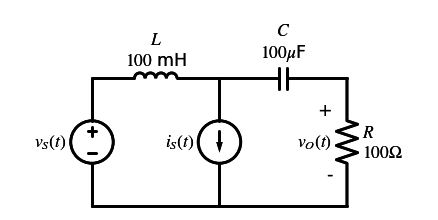

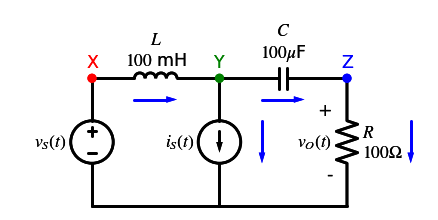

In [5]:
with schemdraw.Drawing(file='nodal-analysis-differential-equations.svg') as d:
    d += elm.SourceV().up().label('$v_S(t)$')
    d += elm.Inductor().right().label('$L$\n$100$ mH')
    d.push()
    d += elm.Capacitor().right().label('$C$\n$100 \mu$F')
    d += elm.Resistor().down().label(['+', '$v_O(t)$', '-']).label('$R$\n$100 \Omega$', loc='bot')
    d += elm.Line().length(6).left()
    d.pop()
    d += elm.SourceI().down().label('$i_S(t)$')

with schemdraw.Drawing(file='nodal-analysis-differential-equations-nodes.svg') as d:
    d += elm.SourceV().up().label('$v_S(t)$')
    d += (NodeA := elm.Dot(color='red').label('X'))
    d += elm.Inductor().right().label('$L$\n$100$ mH')
    d += (NodeB := elm.Dot(color='green').label('Y'))
    d.push()
    d += elm.Capacitor().right().label('$C$\n$100 \mu$F')
    d += (NodeC := elm.Dot(color='blue').label('Z'))
    d += elm.Resistor().down().label(['+', '$v_O(t)$', '-']).label('$R$\n$100 \Omega$', loc='bot')
    d += elm.Line().length(6).left()
    d.pop()
    d += elm.SourceI().down().label('$i_S(t)$')

    d.move_from(NodeA.start, 1, -0.5)
    d += elm.Arrow().right().length(1).color('blue')
    d.move_from(NodeB.start, 1, -0.5)
    d += elm.Arrow().right().length(1).color('blue')
    d.move_from(NodeB.start, 1, -1)
    d += elm.Arrow().down().length(1).color('blue')
    d.move_from(NodeC.start, 1.5, -1)
    d += elm.Arrow().down().length(1).color('blue')


```{index} Nodal Analysis

```

`````{admonition} Example

Find $v_O(t)$ using nodal analysis where

$$
v_S(t) = 6 \cos(100t) \mbox{V}
$$

and

$$
i_S(t) = 4 \cos(100 t + 45^\circ) \mbox{A.}
$$

```{figure} nodal-analysis-differential-equations.svg
---
height: 300px
name: nodal-analysis-differential-equations
---
```

````{admonition} Solution using differential equations
:class: tip, dropdown

First, let's define the nodes and the component current directions.


```{figure} nodal-analysis-differential-equations-nodes.svg
---
height: 400px
name: nodal-analysis-differential-equations-nodes
---
```

**Inductor Current**

The current in inductor $L$ can be derived from

$$
v_L(t) = L \frac{d}{dt} i_L(t)
$$

so

\begin{align*}
i_L(t) &= \frac{1}{L} \int v_L(t) dt + c\\
&= \frac{1}{L} \int \left(v_X(t) - v_Y(t)\right) dt + c
\end{align*}

which is in terms of the node voltages.

**Capacitor Current**

The current in the capacitor $C$ is

$$
i_C(t) = C \frac{d}{dt} v_C(t) = C \frac{d}{dt} \left( v_Y(t) - v_Z(t) \right)
$$

**Resistor Current**

The current in the resistor $R$ is

$$
i_R(t) = v_Z(t)/R
$$

**Node $\color{red}{\bf X}$ :**

At node $\color{red}{\text{X}}$ we can immediately see that

$$
v_X(t) = v_S(t) = 6 \cos(100t)
$$

**Node $\color{green}{\bf Y}$ :**

At node $\color{green}{\text{Y}}$, the KCL equation is

\begin{align*}
i_L(t) - i_S(t) - i_C(t) &= 0\\
\frac{1}{L} \int \left(v_X(t) - v_Y(t)\right) dt + c &\\
- 4 \cos(100 t + 45^\circ) - C \frac{d}{dt} \left( v_Y(t) - v_Z(t) \right) &= 0
\end{align*}

**Node $\color{blue}{\bf Z}$ :**

At node $\color{blue}{\text{Z}}$, the KCL equation is

\begin{align*}
i_C(t) - i_R(t) &= 0\\
C \frac{d}{dt} \left( v_Y(t) - v_Z(t) \right) - v_Z(t)/R &= 0
\end{align*}



````
`````

## References

```{bibliography} ./references.bib
:filter: docname in docnames
```